在RNN中，过长距离的输入的依赖关系因为其计算结构的深度变得很难体现(可以用attention解决，直接查看记忆)；但是RNN无法并行化计算的问题仍然存在，后一状态的计算依赖于前一状态计算的完成。

Attention似乎是一个可行的解决：
- Maximum interation distance $O(1)$ 快速获取记忆信息
- Number of unparallelizable operations donot increase with sequence length.

模型表达能力和参数数量相关        
全连接网络可以利用更多的信息，跨越较长的距离，但是参数数量不固定，增长速度快
我们需要利用结构，找到利用信息量、表达能力和参数数量的平衡。


## Self-Attention
### Constructure
Consider in queries-keys-values perspective:    
$w_{1:n}$ be a sequence of words from $V$        
$w_i \in R^{|V|}$ (one-hot), $E \in R^{d\times|V|}$      
We get each word's embedding by $x_i = Ew_i$.    

- Transform each word embedding into (query, key, value) by mutiplicating $Q,K,V \in R^{d\times d}$
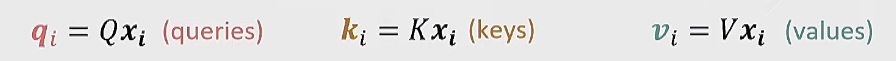
- Compute pairwise similarities between q and k; normalize with softmax; => attention scores
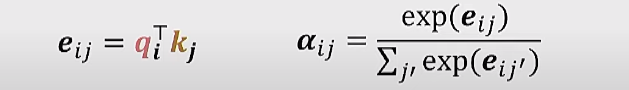
- Compute output for each word with weighted sum of values, using attention scores as weights
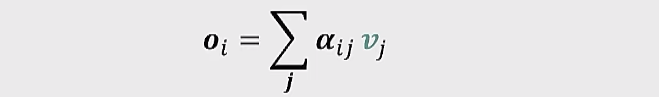


### Problems & fixes
Lack of information for sequence order.    
Fix:    
Consider representing each word's index as a vector
$$p_i \in R^d,\ i = 1,2,...,n$$
A normal to incorporate is to add it to the embedding
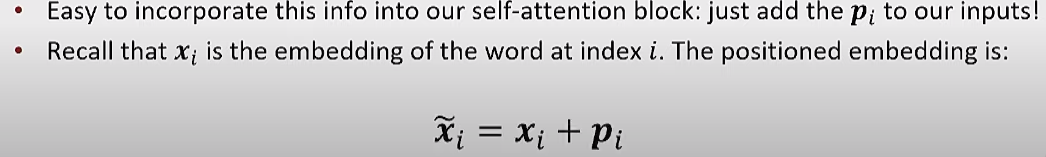
Learned absolute position representation:    
Learn a matrix $p \in R^{d\times n}$, $p_i$ is one column of $p$    
Cons: can not extrapolate to larger n

Lack of element-wise non-linearities.
Stacking self-attention layers is just re-averaging the values.
Fix:      
Add a feed-forward netword 
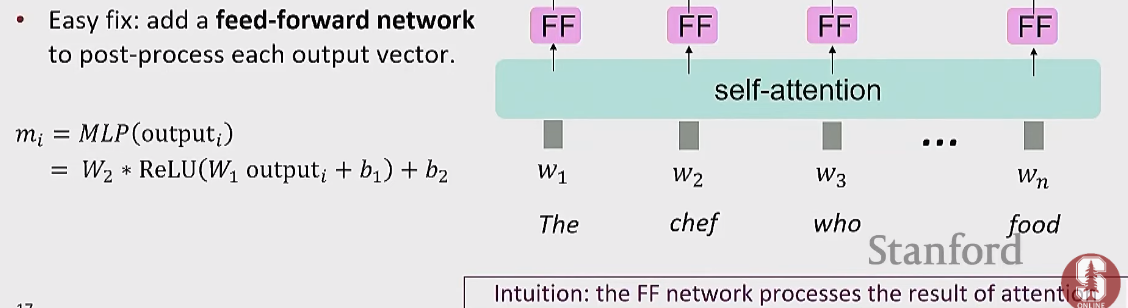


Lack of intuition of sequentially predicting(the structure of self-attention cannot guarantee the queries do not look)
